In [1]:
# importing the deoendencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
# loading the dataset
epidemological_df = pd.read_csv('epidemiologicaldata.csv')

epidemological_df.head()

,date,new_cases
0,2017-08-07,0
1,2017-08-14,1
2,2017-08-21,2
3,2017-08-28,7
4,2017-09-04,8


In [3]:
# convert date column to datetime

epidemological_df['date'] = pd.to_datetime(epidemological_df['date'])
# checking for possible null values
epidemological_df.isnull().sum()

,0
date,0
new_cases,0


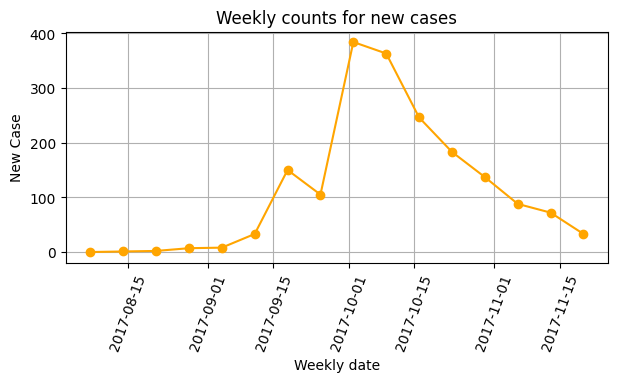

In [4]:
# plotting the line plot

plt.figure(figsize=(7,3))
plt.plot(epidemological_df['date'],epidemological_df['new_cases'],marker='o',linestyle='-',color='orange')
plt.xlabel('Weekly date')
plt.ylabel('New Case')
plt.grid()
plt.xticks(rotation=70)

plt.title('Weekly counts for new cases')
plt.show()

In [5]:
epidemological_df.shape

(16, 2)

In [6]:
epidemological_df.idxmax()

,0
date,15
new_cases,8


In [7]:
# determining first case
# last plague case
# the outbreak peak

first_case_date = epidemological_df[epidemological_df['new_cases']> 0]['date'].min()
last_case_date = epidemological_df[epidemological_df['new_cases']> 0]['date'].max()
plague_outbreak_peak =  epidemological_df.at[epidemological_df['new_cases'].idxmax(),'date']


print(f"EPIDEMOLOGICAL First case date: {first_case_date}")
print(f"EPIDEMOLOGICAL  Last case date: {last_case_date}")
print(f"EPIDEMOLOGICAL  Outbreak Peak date: {plague_outbreak_peak}")


EPIDEMOLOGICAL First case date: 2017-08-14 00:00:00
EPIDEMOLOGICAL  Last case date: 2017-11-20 00:00:00
EPIDEMOLOGICAL  Outbreak Peak date: 2017-10-02 00:00:00


In [8]:
# part 2
# load the datasets from the google trends
peste_df = pd.read_csv('peste.csv',skiprows=1)
peste_madagascar_df = pd.read_csv('peste_madagascar.csv',skiprows=1)
peste_pulmonaire_df = pd.read_csv('peste_pulmonaire.csv',skiprows=1)

In [9]:
peste_df

,Day,peste: (Madagascar)
0,2017-08-01,0
1,2017-08-02,0
2,2017-08-03,0
3,2017-08-04,0
4,2017-08-05,0
...,...,...
107,2017-11-16,0
108,2017-11-17,0
109,2017-11-18,4
110,2017-11-19,0


In [10]:
peste_df.shape

(112, 2)

In [11]:
# converting the date column to datetime

peste_df['Day'] = pd.to_datetime(peste_df['Day'])
peste_madagascar_df['Day'] = pd.to_datetime(peste_madagascar_df['Day'])
peste_pulmonaire_df['Day'] = pd.to_datetime(peste_pulmonaire_df['Day'])

# rename the second column to new_cases
# peste_df.columns.values[1]='new_cases'
# peste_madagascar_df.columns.values[1]='new_cases'
# peste_madagascar_df.columns.values[1]='new_cases'

peste_df.rename(columns={peste_df.columns[1]:'new_cases'},inplace=True)
peste_madagascar_df.rename(columns={peste_madagascar_df.columns[1]:'new_cases'},inplace=True)
peste_pulmonaire_df.rename(columns={peste_pulmonaire_df.columns[1]:'new_cases'},inplace=True)

peste_madagascar_df.head()



,Day,new_cases
0,2017-08-01,0
1,2017-08-02,0
2,2017-08-03,0
3,2017-08-04,0
4,2017-08-05,0


In [12]:
# format the google trends dataframe to fit weeks same as for epidemiological data

start_date = peste_df.iloc[0,0]
end_date = peste_df.iloc[-1,0]
weeks = pd.date_range(start=start_date, periods=17, freq='W-MON')
peste_df.head()


,Day,new_cases
0,2017-08-01,0
1,2017-08-02,0
2,2017-08-03,0
3,2017-08-04,0
4,2017-08-05,0


In [13]:
week_labels = [date.strftime('%Y-%m-%d') for date in weeks[:-1]]

def group_df_by_16_week(df,column_name):
  df['week'] = pd.cut(df['Day'],bins=weeks,right=False,labels=week_labels)
  weekly_sums = df.groupby('week')['new_cases'].sum().reset_index()
  # weekly_sums = df.groupby('week').sum().reset_index()
  weekly_sums.columns = ['week',column_name]
  return weekly_sums

In [14]:
# week_labels = [date.strftime('%Y-%m-%d') for date in weeks[:-1]]
# peste_df['date'] = pd.cut(peste_df['Day'],bins=weeks,right=False,labels=week_labels)

# weekly_sums = peste_df.groupby('date')['new_cases'].sum().reset_index()
# weekly_sums

In [15]:
peste_search_df = group_df_by_16_week(peste_df,'peste')
peste_madagascar_search_df = group_df_by_16_week(peste_madagascar_df,'peste_madagascar')
peste_pulmonaire_search_df = group_df_by_16_week(peste_pulmonaire_df,'peste_pulmonaire')

peste_search_df.tail()

# converting week date to date_time
peste_search_df['week'] = pd.to_datetime(peste_search_df['week'])
peste_madagascar_search_df['week'] = pd.to_datetime(peste_madagascar_search_df['week'])
peste_pulmonaire_search_df['week'] = pd.to_datetime(peste_pulmonaire_search_df['week'])

<ipython-input-13-ff92fc46cc29>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_sums = df.groupby('week')['new_cases'].sum().reset_index()
<ipython-input-13-ff92fc46cc29>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_sums = df.groupby('week')['new_cases'].sum().reset_index()
<ipython-input-13-ff92fc46cc29>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_sums = df.groupby('week')['new_cases'].sum

In [16]:
# merging the datasets
merged_df = peste_search_df.merge(peste_pulmonaire_search_df,on='week').merge(peste_madagascar_search_df, on='week')
merged_df

,week,peste,peste_pulmonaire,peste_madagascar
0,2017-08-07,0,0,0
1,2017-08-14,0,0,0
2,2017-08-21,0,0,0
3,2017-08-28,0,0,0
4,2017-09-04,0,0,0
5,2017-09-11,81,129,44
6,2017-09-18,0,0,0
7,2017-09-25,36,48,30
8,2017-10-02,307,210,412
9,2017-10-09,161,40,331


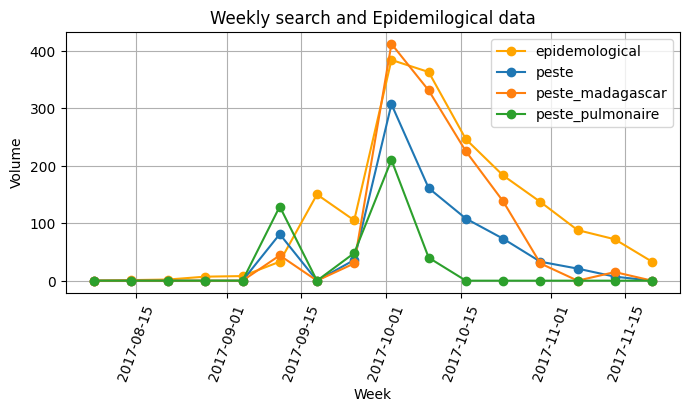

In [17]:
# question 2.1

plt.figure(figsize=(7,4))
plt.plot(epidemological_df['date'],epidemological_df['new_cases'],marker='o',linestyle='-',color='orange',label='epidemological')
plt.plot(merged_df['week'],merged_df['peste'],marker='o',linestyle='-',label='peste')
plt.plot(merged_df['week'],merged_df['peste_madagascar'],marker='o',linestyle='-',label='peste_madagascar')
plt.plot(merged_df['week'],merged_df['peste_pulmonaire'],marker='o',linestyle='-',label='peste_pulmonaire')
plt.xlabel('Week')
plt.ylabel('Volume')
plt.grid()
plt.legend()
plt.xticks(rotation=70)
plt.tight_layout()


plt.title('Weekly search and Epidemilogical data')
plt.show()

In [18]:
# question 2.2 define the first day, last_day and peak_week search appeared per each search trend

def identify_search_data(df, term_name):
    valid_data = df[df[term_name]>0]
    first_day = valid_data['week'].min()
    last_day = valid_data['week'].max()
    peak_week = valid_data.groupby(pd.Grouper(key='week', freq='W-MON'))[term_name].sum().idxmax()
    return first_day, last_day, peak_week

In [19]:
# extract the first search, last_day and peak_week on each search trend
first_day_peste, last_day_peste, peak_week_peste = identify_search_data(merged_df, 'peste')
first_day_pulmonaire, last_day_pulmonaire, peak_week_pulmonaire = identify_search_data(merged_df, 'peste_pulmonaire')
first_day_madagascar, last_day_madagascar, peak_week_madagascar = identify_search_data(merged_df, 'peste_madagascar')


In [20]:
# printing the results

print(f"Peste - First Day: {first_day_peste}, Last Day: {last_day_peste}, Peak Week: {peak_week_peste}")
print(f"Peste Pulmonaire- First Day: {first_day_pulmonaire}, Last Day: {last_day_pulmonaire}, Peak Week: {peak_week_pulmonaire}")
print(f"Peste Madagascar- First Day: {first_day_pulmonaire}, Last Day: {last_day_pulmonaire}, Peak Week: {peak_week_pulmonaire}")

Peste - First Day: 2017-09-11 00:00:00, Last Day: 2017-11-13 00:00:00, Peak Week: 2017-10-02 00:00:00
Peste Pulmonaire- First Day: 2017-09-11 00:00:00, Last Day: 2017-10-09 00:00:00, Peak Week: 2017-10-02 00:00:00
Peste Madagascar- First Day: 2017-09-11 00:00:00, Last Day: 2017-10-09 00:00:00, Peak Week: 2017-10-02 00:00:00


In [21]:
# Question 3 --> Correlations
epidemological_df.rename({'date':'week'},axis=1,inplace=True)
epidemological_df['week'] = pd.to_datetime(epidemological_df['week'])

epidemological_df.head()


,week,new_cases
0,2017-08-07,0
1,2017-08-14,1
2,2017-08-21,2
3,2017-08-28,7
4,2017-09-04,8


In [22]:
# apply merging the dataframe with epidemiology

data_madagascar = pd.merge(peste_madagascar_search_df, epidemological_df, on='week')
data_peste = pd.merge(peste_search_df, epidemological_df, on='week')
data_pulmonaire = pd.merge(peste_pulmonaire_search_df, epidemological_df, on='week')
data_pulmonaire.head()


,week,peste_pulmonaire,new_cases
0,2017-08-07,0,0
1,2017-08-14,0,1
2,2017-08-21,0,2
3,2017-08-28,0,7
4,2017-09-04,0,8


In [23]:
# calculate the correlation with ground truth data
correlation_madagascar = data_madagascar['peste_madagascar'].corr(data_madagascar['new_cases'])
correlation_peste = data_peste['peste'].corr(data_peste['new_cases'])
correlation_pulmonaire = data_pulmonaire['peste_pulmonaire'].corr(data_pulmonaire['new_cases'])

In [24]:
# printing the results
print(f"Peste Madagascar correlation searches: {correlation_madagascar}")
print(f"Peste correlation searches: {correlation_peste}" )
print(f"Peste Pulmonaire correlation searches:{correlation_pulmonaire}")

Peste Madagascar correlation searches: 0.9310496462758787
Peste correlation searches: 0.8690834587124728
Peste Pulmonaire correlation searches:0.5009197203586835


In [25]:
# Question 4 Predicting case counts from search trends
merged_df.head()

# make the trainning and test dates for cutting off
training_cutoff_date = pd.Timestamp('2017-09-19')
test_cutoff_date = pd.Timestamp('2017-09-25')


In [26]:
training_data = merged_df[ merged_df['week'] <= training_cutoff_date ]
testing_data = merged_df[merged_df['week'] >= test_cutoff_date]

#printing the number of weeks in each splitted data for training and testing

print(f"Number of weeks in the Training data: {len(training_data)} and the rows: {training_data.shape}")
print(f"Number of weeks in the Testing data: {len(testing_data)} amd the rows : {testing_data.shape}")

Number of weeks in the Training data: 7 and the rows: (7, 4)
Number of weeks in the Testing data: 9 amd the rows : (9, 4)


In [27]:
# preview the training data
training_data.shape

(7, 4)

In [28]:
# preview the testing data
testing_data.shape

(9, 4)

In [29]:
# Question 4.2

peste_train_set = data_peste[data_peste['week'] <= training_cutoff_date]
peste_testing_set = data_peste[data_peste['week'] >= test_cutoff_date]

print(peste_testing_set.shape)

# training values
X_peste_train = peste_train_set[['peste']]
y_train = peste_train_set['new_cases']

# testing values

X_test = peste_testing_set[['peste']]
y_test = peste_testing_set['new_cases']



(9, 3)


In [30]:
# train the linear regression model

first_model = LinearRegression()

first_model.fit(X_peste_train,y_train)

# test prediction
first_model_prediction = first_model.predict(X_test)

In [31]:

#  correlation between predicted and actual case counts in the test set
correlation = np.corrcoef(first_model_prediction, y_test)[0, 1]
print(f"Univariate correlation between predictions and actual case counts in the test set: {correlation:.3f}")

Univariate correlation between predictions and actual case counts in the test set: 0.931


In [32]:
# the mean absolute error calculation
mae = mean_absolute_error(y_test, first_model_prediction)
print(f"Univariate MAE of the predictions in the test set: {mae:.3f}")

Univariate MAE of the predictions in the test set: 145.883


In [33]:
# printing out the
print(f"Number of weeks in the training set: {len(peste_train_set)}")
print(f"Number of weeks in the test set: {len(peste_testing_set)}")

Number of weeks in the training set: 7
Number of weeks in the test set: 9


In [34]:
# Question 4.3
# append the new_cases on the whole dataframe and rename for the ground truth data date column to 'week'
epidemological_df.rename({'date':'week'},inplace=True)
merged_df = peste_search_df.merge(peste_pulmonaire_search_df,on='week').merge(peste_madagascar_search_df, on='week').merge(epidemological_df, on='week')

merged_df.head()

,week,peste,peste_pulmonaire,peste_madagascar,new_cases
0,2017-08-07,0,0,0,0
1,2017-08-14,0,0,0,1
2,2017-08-21,0,0,0,2
3,2017-08-28,0,0,0,7
4,2017-09-04,0,0,0,8


In [35]:
train_set_merged = merged_df[merged_df['week']<= training_cutoff_date]
test_set_merged = merged_df[merged_df['week']>= test_cutoff_date]

print(test_set_merged.shape)

# identify the train dataframe based on 'peste','peste madagascar' and 'peste pulmonaire'
X_train_merged = train_set_merged[['peste','peste_pulmonaire','peste_madagascar']]
y_train_merged = train_set_merged['new_cases']

# identify the test dataframe based on 'peste','peste madagascar' and 'peste pulmonaire'
X_test_merged = test_set_merged[['peste','peste_pulmonaire','peste_madagascar']]
y_test_merged = test_set_merged['new_cases']


(9, 5)


In [36]:
# train the linear gression model
second_model = LinearRegression()
second_model.fit(X_train_merged,y_train_merged)

# predictin on the test set
second_model_prediction = second_model.predict(X_test_merged)

#the correlation between predicted and actual case counts in the test set
correlation = np.corrcoef(second_model_prediction, y_test_merged)[0, 1]
print(f"Multivariate Correlation between predictions and actual case counts in the test set: {correlation:.3f}")

Multivariate Correlation between predictions and actual case counts in the test set: 0.894


In [37]:
# mean absolute error
mae_merged = mean_absolute_error(y_test_merged,second_model_prediction)
print(f"Mutlivariate Mean Absolute Error (MAE) predictions in the test set: {mae_merged:.3f}")

Mutlivariate Mean Absolute Error (MAE) predictions in the test set: 147.667


<ipython-input-38-e95df35ce2b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peste_testing_set['univariate_predict'] = first_model_prediction
<ipython-input-38-e95df35ce2b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set_merged['mutlivariate_predict'] = second_model_prediction


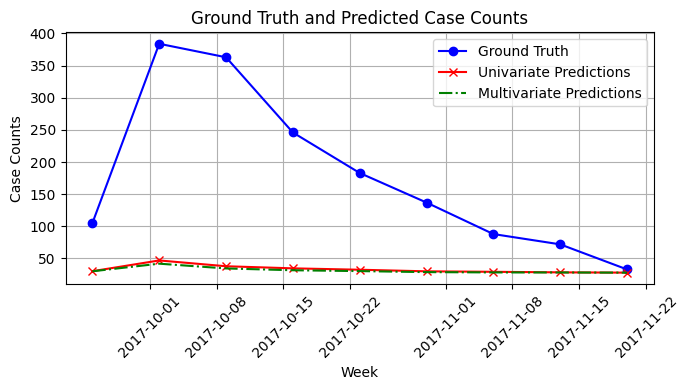

In [38]:
# Question 4.4

peste_testing_set['univariate_predict'] = first_model_prediction
test_set_merged['mutlivariate_predict'] = second_model_prediction

plt.figure(figsize=(7, 4))
plt.plot(peste_testing_set['week'], peste_testing_set['new_cases'], label='Ground Truth', marker='o', color='blue')
plt.plot(peste_testing_set['week'], peste_testing_set['univariate_predict'], label='Univariate Predictions', marker='x', color='red')
plt.plot(test_set_merged['week'], test_set_merged['mutlivariate_predict'], label='Multivariate Predictions', linestyle='-.', color='green')

plt.title('Ground Truth and Predicted Case Counts')
plt.xlabel('Week')
plt.ylabel('Case Counts')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [39]:
# Question 5

epidemological_df_original = epidemological_df.copy(True)
epidemological_df['lag_1'] = epidemological_df['new_cases'].shift(1)

In [40]:
# split the dataset into training and testing based on date for the second week to ignore the first week

spliting_date = pd.Timestamp('2017-09-19')

train_df = epidemological_df[(epidemological_df['week'] <= spliting_date) & (epidemological_df['week'] > epidemological_df['week'].min())]
test_df = epidemological_df[epidemological_df['week'] > spliting_date]

# select the independent and dependent variables

X_train = train_df[['lag_1']].dropna()  # droping  any rows with NaN values
y_train = train_df['new_cases'].loc[X_train.index]  #


X_test = test_df[['lag_1']].dropna()
y_test = test_df['new_cases'].loc[X_test.index]


In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

In [42]:
# the mean absolute error
mae = mean_absolute_error(y_test, prediction)

# the correlation between predicted and actual case counts
correlation = np.corrcoef(prediction, y_test)[0, 1] if len(prediction) > 1 else "Not calculable"

print(f"Correlation between predictions and actual case counts on the test set: {correlation}")
print(f"Mean Absolute Error (MAE) on the test set: {mae:.3f}")

Correlation between predictions and actual case counts on the test set: 0.5659406539941269
Mean Absolute Error (MAE) on the test set: 703.202


In [43]:
# Question 5.2

epidemological_df['lag_2'] = epidemological_df['new_cases'].shift(2)
epidemological_df['lag_3'] = epidemological_df['new_cases'].shift(3)

epidemological_df.head()

,week,new_cases,lag_1,lag_2,lag_3
0,2017-08-07,0,NaN,NaN,NaN
1,2017-08-14,1,0.0,NaN,NaN
2,2017-08-21,2,1.0,0.0,NaN
3,2017-08-28,7,2.0,1.0,0.0
4,2017-09-04,8,7.0,2.0,1.0


In [44]:
# excluding the first 3 weeks

cleaned_data = epidemological_df[epidemological_df['week'] > epidemological_df['week'].min() + pd.Timedelta(weeks=3)]

train_df_lags = cleaned_data [cleaned_data['week'] <= spliting_date]
test_df_lags = cleaned_data [cleaned_data['week'] > spliting_date]

In [45]:
# define independent and dependent variables for traing and testing

X_train = train_df_lags[['lag_1', 'lag_2', 'lag_3']]
y_train = train_df_lags['new_cases']

X_test = test_df_lags[['lag_1', 'lag_2', 'lag_3']]
y_test = test_df_lags['new_cases']

In [46]:
model_lags = LinearRegression()
model_lags.fit(X_train,y_train)
# make the model prediction

lags_prediction = model_lags.predict(X_test)


In [47]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, lags_prediction)

# Correlation
correlation = np.corrcoef(lags_prediction, y_test)[0, 1] if len(lags_prediction) > 1 else " skip it "

print(f"correlation between lags predictions and actual case counts on the test set: {correlation}")
print(f"Mean Absolute Error (MAE) on the test set: {mae:.3f}")

correlation between lags predictions and actual case counts on the test set: 0.33410935118331003
Mean Absolute Error (MAE) on the test set: 1586.798


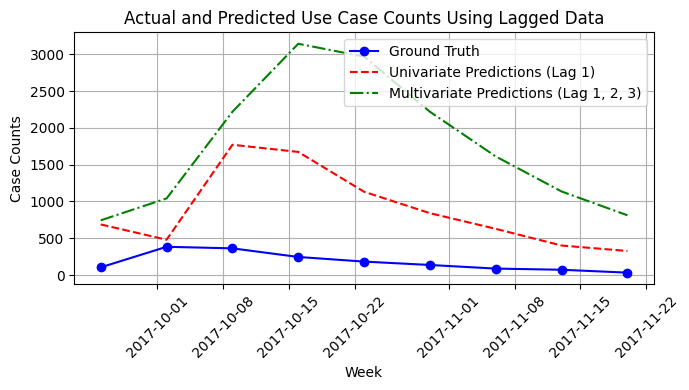

In [48]:
# Question 5.3

plt.figure(figsize=(7, 4))
plt.plot(test_df['week'], y_test, label='Ground Truth', marker='o', linestyle='-', color='blue')
plt.plot(test_df['week'], prediction, label='Univariate Predictions (Lag 1)', linestyle='--', color='red')
plt.plot(test_df['week'], lags_prediction, label='Multivariate Predictions (Lag 1, 2, 3)', linestyle='-.', color='green')

plt.title('Actual and Predicted Use Case Counts Using Lagged Data')
plt.xlabel('Week')
plt.ylabel('Case Counts')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [49]:
# Question 6
# epidemological_df_original.head()
merged_df['lag_1'] = merged_df['new_cases'].shift(1)
# now removing the first row as it was null

merged_df = merged_df.iloc[1:]
merged_df.head()

,week,peste,peste_pulmonaire,peste_madagascar,new_cases,lag_1
1,2017-08-14,0,0,0,1,0.0
2,2017-08-21,0,0,0,2,1.0
3,2017-08-28,0,0,0,7,2.0
4,2017-09-04,0,0,0,8,7.0
5,2017-09-11,81,129,44,33,8.0


In [50]:

# splitting the dataset into training and testing sets
train_df = merged_df[merged_df['week'] <= spliting_date]
test_df = merged_df[merged_df['week'] > spliting_date]

# Selecting predictors and the response variable
X_train = train_df[['peste', 'peste_pulmonaire', 'peste_madagascar', 'lag_1']]
y_train = train_df['new_cases']

X_test = test_df[['peste', 'peste_pulmonaire', 'peste_madagascar', 'lag_1']]
y_test = test_df['new_cases']

In [51]:
# training the model

lag_and_search_trends_model = LinearRegression()
lag_and_search_trends_model.fit(X_train,y_train)

# make prediction
lag_and_search_trends_model_prediction = lag_and_search_trends_model.predict(X_test)


In [52]:
# assess the model

mae = mean_absolute_error(y_test, lag_and_search_trends_model_prediction)

# Calculate the correlation between predicted and actual case counts
correlation = np.corrcoef(lag_and_search_trends_model_prediction, y_test)[0, 1] if len(lag_and_search_trends_model_prediction) > 1 else "skip it "

print(f"correlation between lags and search terms predictions and actual case counts on the test set: {correlation}")
print(f"Mean Absolute Error (MAE) on the test set: {mae:.3f}")


correlation between lags and search terms predictions and actual case counts on the test set: 0.5688728353536412
Mean Absolute Error (MAE) on the test set: 704.548


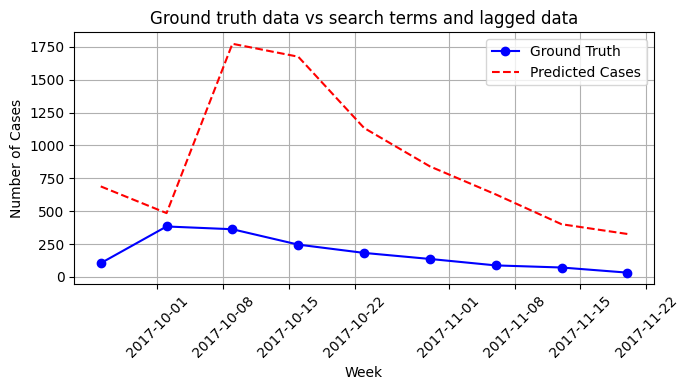

In [53]:
# Question 6.2

plt.figure(figsize=(7, 4))
plt.plot(test_df['week'], y_test, label='Ground Truth ', marker='o', linestyle='-', color='blue')
plt.plot(test_df['week'], lag_and_search_trends_model_prediction, label='Predicted Cases', linestyle='--', color='red')

plt.title('Ground truth data vs search terms and lagged data')
plt.xlabel('Week')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
